<a href="https://colab.research.google.com/github/lafa-code/MachineLearning/blob/main/Features_Selection_Pearson_Correlation_dan_Spearman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Data_stroke.csv')
df = pd.read_csv('/content/drive/MyDrive/Internal-2024/Data_stroke.csv')

In [ ]:
# "Ubah kolom kategorikal (seperti 'gender', 'work_type', dll) menjadi bentuk numerik menggunakan one-hot encoding, kalau tidak diubah maka kita tidak bisa menghitung matriks korelasi."
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# cek encoding
df_encoded

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,True,True,False,False,True,True,False,False
1,80.0,0,1,105.92,32.5,1,True,True,True,False,False,False,False,True,False
2,49.0,0,0,171.23,34.4,1,False,True,True,False,False,True,False,False,True
3,79.0,1,0,174.12,24.0,1,False,True,False,True,False,False,False,True,False
4,81.0,0,0,186.21,29.0,1,True,True,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,True,False,True,False,False,False,True,False,False
4977,40.0,0,0,191.15,31.1,0,True,True,True,False,False,True,False,False,True
4978,45.0,1,0,95.02,31.8,0,False,True,False,False,False,False,False,False,True
4979,40.0,0,0,83.94,30.0,0,True,True,True,False,False,False,False,False,True


In [ ]:
# memanggil fungsi korelasi di pandas

# #pearson
# corr_matrix = df.corr()
#spearmen
corr_matrix=df.corr(method='spearman')

corr_matrix

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.018037,0.021485,0.086476,-0.028971,0.053937,-0.004301,0.049636,0.011811,-0.062905,0.008870
age,-0.018037,1.000000,0.282577,0.271159,0.661365,-0.286391,0.016859,0.142399,0.376880,0.233049,0.251262
hypertension,0.021485,0.282577,1.000000,0.111974,0.164534,-0.037634,-0.004755,0.110959,0.168850,0.107850,0.131965
heart_disease,0.086476,0.271159,0.111974,1.000000,0.114765,-0.018192,0.002125,0.109575,0.076483,0.046452,0.134610
ever_married,-0.028971,0.661365,0.164534,0.114765,1.000000,-0.335249,0.008191,0.094302,0.386216,0.256635,0.108398
work_type,0.053937,-0.286391,-0.037634,-0.018192,-0.335249,1.000000,-0.002621,-0.020381,-0.322357,-0.303646,-0.026442
Residence_type,-0.004301,0.016859,-0.004755,0.002125,0.008191,-0.002621,1.000000,-0.009397,0.007720,0.010183,0.016494
avg_glucose_level,0.049636,0.142399,0.110959,0.109575,0.094302,-0.020381,-0.009397,1.000000,0.121999,0.036274,0.082897
bmi,0.011811,0.376880,0.168850,0.076483,0.386216,-0.322357,0.007720,0.121999,1.000000,0.237034,0.062258
smoking_status,-0.062905,0.233049,0.107850,0.046452,0.256635,-0.303646,0.010183,0.036274,0.237034,1.000000,0.025732


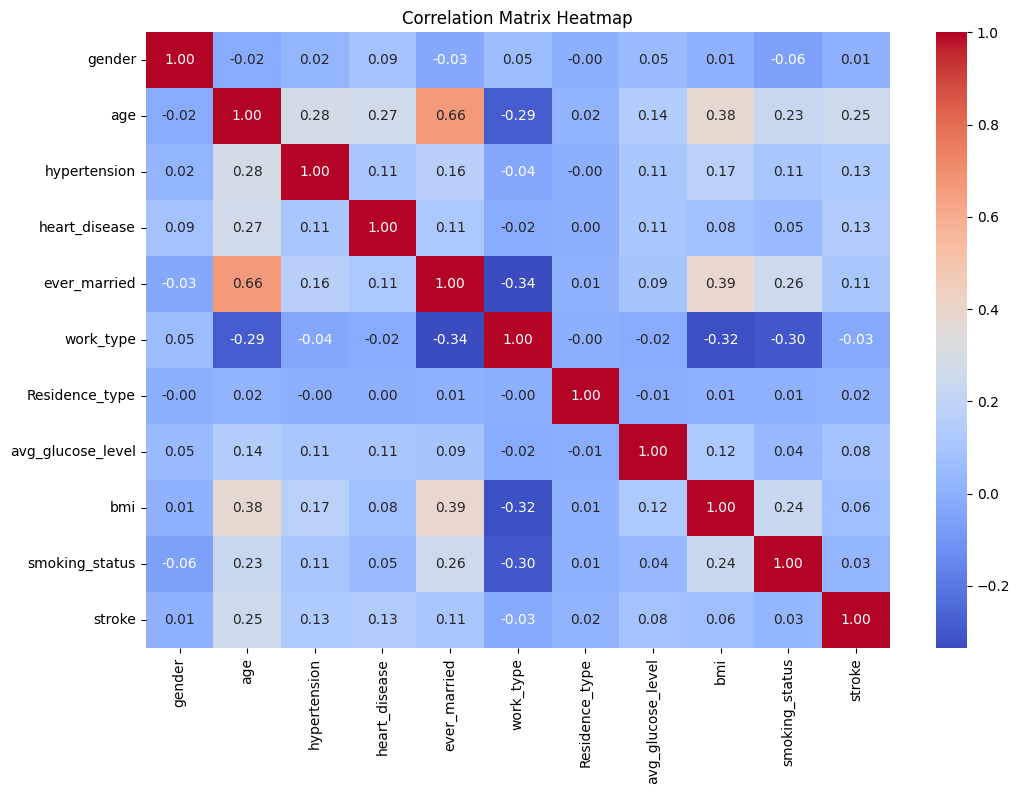

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
#ambang 0,5 mengurangi redudant variabel

threshold = 0.5

# ambil untuk segitiga atas matriks korelasi. Karena bagian bawah merupakan pengulangan.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

# Fitur yang tersisa setelah menghilangkan fitur yang berkorelasi tinggi
remaining_features = df.columns.difference(to_drop)

print("Fitur yang dihilangkan karena korelasi antar fitur yang tinggi:", to_drop)
print("digunakan: after selection:", remaining_features.tolist())

Kita coba korelasi ke target

In [ ]:
stroke_corr = corr_matrix['stroke'].drop('stroke').sort_values(ascending=False)

stroke_corr

In [ ]:
# skor dan memilih fitur

selected_features = stroke_corr[stroke_corr.abs() > 0.1].index.tolist()

print(selected_features)